In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Basic EDA and data cleaning to 

- Remove duplicates
- Remove/fill NaN values
- Correct the formatting and dtypes

In [342]:
hn = pd.read_csv("hacker_news.csv")
hn.head(4)

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01


In [344]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            20100 non-null  int64 
 1   title         20100 non-null  object
 2   url           17660 non-null  object
 3   num_points    20100 non-null  int64 
 4   num_comments  20100 non-null  int64 
 5   author        20100 non-null  object
 6   created_at    20100 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [346]:
hn.describe()

,id,num_points,num_comments
count,2.010000e+04,20100.000000,20100.000000
mean,1.131753e+07,50.296070,24.802289
std,6.964399e+05,107.107687,56.107340
min,1.017691e+07,1.000000,1.000000
25%,1.070176e+07,3.000000,1.000000
50%,1.128445e+07,9.000000,3.000000
75%,1.192607e+07,54.000000,21.000000
max,1.257898e+07,2553.000000,1733.000000


In [348]:
hn[hn.duplicated()]

,id,title,url,num_points,num_comments,author,created_at


Hence no duplicate values

In [351]:
pd.concat([(hn.isnull().sum()/len(hn))*100,hn.isnull().sum()], axis=1, keys=['miss%','miss_vals'])

,miss%,miss_vals
id,0.000000,0
title,0.000000,0
url,12.139303,2440
num_points,0.000000,0
num_comments,0.000000,0
author,0.000000,0
created_at,0.000000,0


In [353]:
hn = hn.dropna()

In [355]:
hn.isnull().sum()

id              0
title           0
url             0
num_points      0
num_comments    0
author          0
created_at      0
dtype: int64

In [369]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17660 entries, 0 to 20099
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             17660 non-null  int64         
 1   title          17660 non-null  object        
 2   url            17660 non-null  object        
 3   num_points     17660 non-null  int64         
 4   num_comments   17660 non-null  int64         
 5   author         17660 non-null  object        
 6   created_at     17660 non-null  datetime64[ns]
 7   month_created  17660 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(3)
memory usage: 1.6+ MB


In [357]:
hn['created_at'] = pd.to_datetime(hn['created_at'])

## Analyzing the most active users by counting how many times they have authored a post!

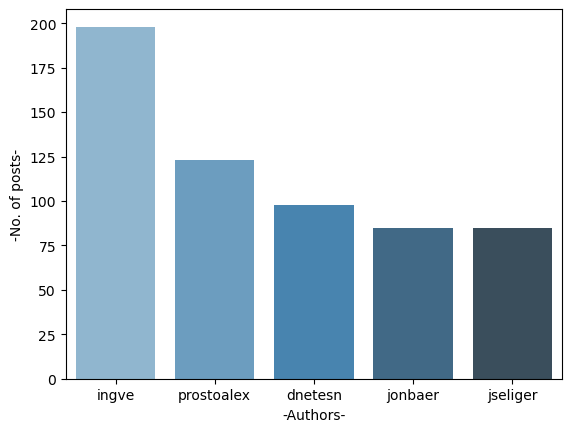

In [359]:
ax = sns.barplot(
    y=hn['author'].value_counts().head(5), 
    x=hn['author'].value_counts().head(5).index,
    palette='Blues_d'
)
ax.set(xlabel='-Authors-', ylabel='-No. of posts-')
plt.show()

### Conclusion
   We can see `ingve` is the most active user

## Dividing months into Quarters

- First converted `created_at` column into correct date_time format using `pd.to_datetime()` function
- Then extracted month data from column using `.dt.month` object and stored in new list then converted it into DataFrame
- Then added new column `qtr_info` using `month_created` and if/elif clauses

In [361]:
hn['month_created'] = hn['created_at'].dt.month
hn.head(2)

,id,title,url,num_points,num_comments,author,created_at,month_created
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,2016-08-04 11:52:00,8
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,2016-01-26 19:30:00,1


In [391]:
b = []
for i in range(len(hn['month_created'])):
    a = hn['month_created'].iloc[i]
    if a<4:
        b.append('Q1')
    elif a>=4 and a<7:
        b.append('Q2')
    elif a>=7 and a<10:
        b.append('Q3')
    elif a>=10 and a<12:
        b.append('Q4')

qtr_df = pd.DataFrame({'qtr':b})
qtr_df.head()

,qtr
0,Q3
1,Q1
2,Q2
3,Q2
4,Q3


In [387]:
hn['qtr_info'] = qtr_df

In [389]:
hn.head(2)

,id,title,url,num_points,num_comments,author,created_at,month_created,qtr_info
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,2016-08-04 11:52:00,8,Q3
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,2016-01-26 19:30:00,1,Q1


## Posts according to different Quarters of the Year

In [431]:
hn['num_points'].groupby(hn['qtr_info']).sum().sort_values(ascending=False)

qtr_info
Q3    237392
Q1    209606
Q2    197111
Q4    142399
Name: num_points, dtype: int64

### Conclusion ->
    Most posts were added in Q3 i.e. July, August and September!

## Posts according to the hour of the day

In [423]:
hn['num_points'].groupby(hn['created_at'].dt.hour).sum().sort_values(ascending=False)

created_at
17    70073
15    64939
16    62017
14    61225
18    60365
13    59724
19    57686
12    47538
21    43722
20    42756
11    39272
22    39115
0     36686
23    36391
10    36288
9     29216
8     27002
2     26034
7     25837
1     25771
4     22798
3     22723
5     19411
6     19157
Name: num_points, dtype: int64

### Conclusion ->
    Hence most posts are created at 17:00 hours, while max. freq of posts being created b/w 13:00 to 19:00 hours